## 多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.uniform(-3, 3, size=100)
X = X.reshape(100, 1)
Y = 0.5 * X**2 + X + 2 + np.random.normal(0, 1 , size=100).reshape(-1,1)
Y.shape

(100, 1)

## 多项式回归属于预处理，属于对于数据的升维

In [3]:
from sklearn.preprocessing import PolynomialFeatures
# 这个参数意味着，给原本的特征添加最多几次幂
polf = PolynomialFeatures(degree=5)
polf.fit(X)
X2 = polf.transform(X)
print(X2.shape)

(100, 6)


In [4]:
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()
line_reg.fit(X2, Y)
Y_pre = line_reg.predict(X2)

## 绘制相应的图形

# 划重点！！np新版本的排序函数，要严格选择排序的是行还是列，不然会出现很麻烦的bug

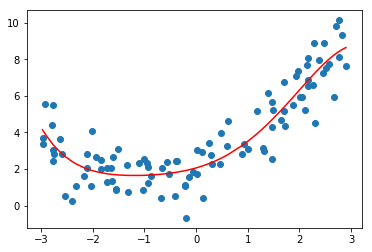

In [5]:
plt.scatter(X, Y)
plt.plot(np.sort(X,axis=0), Y_pre[np.argsort(X,axis=0),0], color='r')
# plt.plot(X, Y_pre, color='r')
plt.show()

## 输出线性代数中的每一列数据拟合度

In [6]:
print(line_reg.coef_)

[[ 0.          0.80440444  0.52740435  0.13904646 -0.00374224 -0.01616295]]


## pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [43]:
# 值得注意的是，这里面用的是括号，不是花括号或者其他
poly_arg = [
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("line_reg", LinearRegression())
]
poly_reg = Pipeline(poly_arg)

## 管道作用是，每一次调用管道都会沿着这三步运行下去

In [45]:
poly_reg.fit(X, Y)
Y_pre = poly_reg.predict(X)